In [7]:
import os
import re

base_dir = "."

execution_time_pattern = re.compile(r"execution time (\d+\.\d+) \(s\)")
max_memory_pattern = re.compile(r"Max Memory \(KB\): (\d+)")

results = {
    "nomad": {"version": "5.13", "time": [], "memory": []},
    "tpp": {"version": "5.13", "time": [], "memory": []},
    "generic": {"version": "6.08", "time": [], "memory": []}
}

for root, dirs, files in os.walk(base_dir):
    if "output.log" in files:
        output_log_path = os.path.join(root, "output.log")
        
        if "nomad" in root:
            group = "nomad"
        elif "tpp" in root:
            group = "tpp"
        elif "generic" in root:
            group = "generic"
        else:
            continue
        
        with open(output_log_path, "r") as f:
            log_content = f.read()
        
        # Extract execution time
        execution_time_match = execution_time_pattern.search(log_content)
        if execution_time_match:
            execution_time = float(execution_time_match.group(1))
            results[group]["time"].append(execution_time)
        
        # Extract max memory
        max_memory_match = max_memory_pattern.search(log_content)
        if max_memory_match:
            max_memory_kb = float(max_memory_match.group(1))
            max_memory_mb = max_memory_kb / 1024  # Convert to MB
            results[group]["memory"].append(max_memory_mb)

def compute_average(values):
    return sum(values) / len(values) if values else 0

for group, data in results.items():
    avg_time = compute_average(data["time"])
    avg_memory = compute_average(data["memory"])
    print(f"Kernel: {group} ({data['version']})")
    print(f"Average Execution Time: {avg_time:.2f} seconds")
    print(f"Max Memory: {avg_memory:.2f} MB")
    print("-" * 40)

Kernel: nomad (5.13)
Average Execution Time: 44.49 seconds
Max Memory: 2748.74 MB
----------------------------------------
Kernel: tpp (5.13)
Average Execution Time: 44.42 seconds
Max Memory: 2789.27 MB
----------------------------------------
Kernel: generic (6.08)
Average Execution Time: 48.26 seconds
Max Memory: 2808.03 MB
----------------------------------------


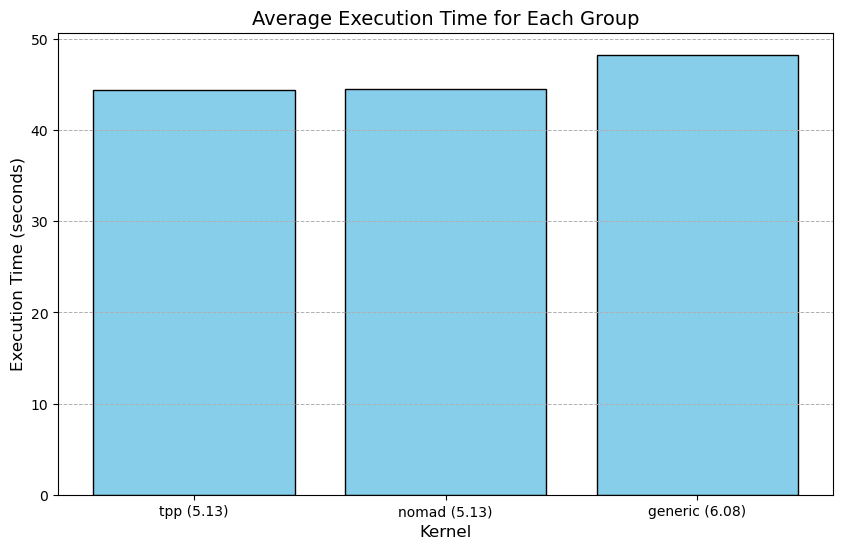

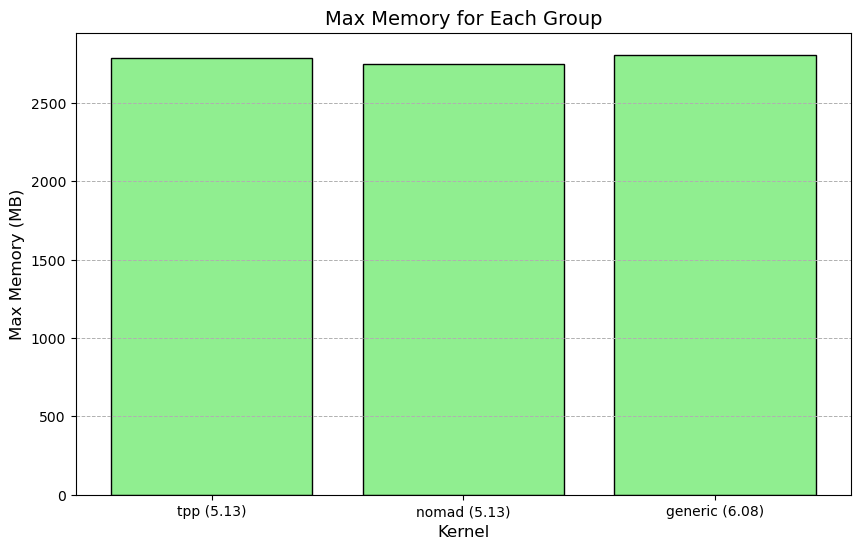

In [13]:
import matplotlib.pyplot as plt

group_versions = {
    "tpp (5.13)": {"time": compute_average(results["tpp"]["time"]), "memory": compute_average(results["tpp"]["memory"])},
    "nomad (5.13)": {"time": compute_average(results["nomad"]["time"]), "memory": compute_average(results["nomad"]["memory"])},
    "generic (6.08)": {"time": compute_average(results["generic"]["time"]), "memory": compute_average(results["generic"]["memory"])},
}

# Extract data for plotting
groups = list(group_versions.keys())
avg_exec_times = [group_versions[group]["time"] for group in groups]
avg_max_memory = [group_versions[group]["memory"] for group in groups]

# Plot for Average Execution Time
plt.figure(figsize=(10, 6))
plt.bar(groups, avg_exec_times, color='skyblue', edgecolor='black')
plt.title('Average Execution Time for Each Group', fontsize=14)
plt.xlabel('Kernel', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.show()

# Plot for Average Max Memory
plt.figure(figsize=(10, 6))
plt.bar(groups, avg_max_memory, color='lightgreen', edgecolor='black')
plt.title('Max Memory for Each Group', fontsize=14)
plt.xlabel('Kernel', fontsize=12)
plt.ylabel('Max Memory (MB)', fontsize=12)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.show()

# numastat.log

Per-node process memory usage (in MBs) for PID 1 (systemd)
                           Node 0          Node 1           Total
                  --------------- --------------- ---------------
Huge                         0.00            0.00            0.00
Heap                         2.15            0.01            2.16
Stack                        0.05            0.00            0.05
Private                      2.56            3.00            5.56
----------------  --------------- --------------- ---------------
Total                        4.77            3.00            7.77

Per-node system memory usage (in MBs):
Token SwapCached not in hash table.
Token FileHugePages not in hash table.
Token FilePmdMapped not in hash table.
Token SwapCached not in hash table.
Token FileHugePages not in hash table.
Token FilePmdMapped not in hash table.
                          Node 0          Node 1           Total
                 --------------- --------------- ---------------
MemTotal                 7996.93        32225.36        40222.29
MemFree                  7261.05        32113.60        39374.65
MemUsed                   735.88          111.76          847.64
Active                     71.16           63.97          135.13
Inactive                  354.80           28.54          383.34
Active(anon)               47.54            0.62           48.16
Inactive(anon)            341.41           11.93          353.34
Active(file)               23.62           63.35           86.97
Inactive(file)             13.39           16.61           30.00
Unevictable                 0.00            0.00            0.00
Mlocked                     0.00            0.00            0.00
Dirty                       0.12            0.23            0.35
Writeback                   0.00            0.00            0.00
FilePages                  61.49           86.45          147.93
Mapped                     35.89           79.95          115.84
AnonPages                 367.80            9.41          377.22
Shmem                       6.03            0.00            6.03
KernelStack                 7.69            0.02            7.70
PageTables                 13.43            0.00           13.43
NFS_Unstable                0.00            0.00            0.00
Bounce                      0.00            0.00            0.00
WritebackTmp                0.00            0.00            0.00
Slab                      104.46           15.00          119.46
SReclaimable               27.42            6.50           33.92
SUnreclaim                 77.04            8.50           85.54
AnonHugePages             180.00            2.00          182.00
ShmemHugePages              0.00            0.00            0.00
ShmemPmdMapped              0.00            0.00            0.00
HugePages_Total             0.00            0.00            0.00
HugePages_Free              0.00            0.00            0.00
HugePages_Surp              0.00            0.00            0.00
KReclaimable               27.42            6.50           33.92